In [5]:

import featuretools as ft
import numpy as np
import pandas as pd

data = pd.read_csv("C:\\loans.csv")
data

list(data)

['client_id',
 'loan_type',
 'loan_amount',
 'repaid',
 'loan_id',
 'loan_start',
 'loan_end',
 'rate']

In [6]:

data.head(10)


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13
5,46109,home,6935,0,11501,2006-09-17,2008-11-26,1.94
6,46109,cash,6177,1,11141,2007-03-12,2009-04-26,9.48
7,46109,home,12656,0,11658,2006-05-26,2007-10-15,4.14
8,46109,home,11062,1,11611,2012-09-12,2014-03-14,5.48
9,46109,other,4050,1,10828,2003-12-06,2005-08-19,4.26


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        48

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89

1.0


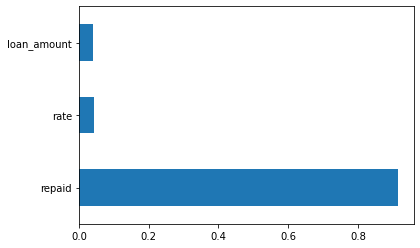

In [7]:

# In the dataframe shown directly above we can see the features in the dataset.  Honesylt, there is not a whole lot here that we can work with.
# We can't train our model on IDs, and we may not be savy enough in the domain of 'loan' to know how to fully utilize the dates features.
# Even though we have some serious handicaps in knowledge, let's find the independent features that have the highest statistical impact on the dependent feature ('repaid').
# Manual Feature Engineering
X = data.drop(['client_id','loan_id','loan_type','loan_start','loan_end'], axis=1)
y = data['repaid']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)


from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))


feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')


In [8]:

# I recently came across 'featuretools', which allows users to do automated featue engineering.
# Without knowing a whole lot about the 'loans' business, let's have the computer create some features for us automatically, based on time slices, percentiles, cumulative means, etc., etc., etc.
es = ft.EntitySet(id="customer_data")
es = es.entity_from_dataframe(entity_id='client_id',
                              dataframe=data,
                              index="id",
                              make_index=True)

feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_entity="client_id",
                                      trans_primitives=['time_since', 'day', 'is_weekend',
                                                        'cum_min', 'minute',
                                                        'num_words', 'weekday', 'cum_count',
                                                        'percentile', 'year', 'week',
                                                        'cum_mean'])
list(feature_matrix)

# Note: these are just a small subset of all the priitives you can fiddle around with.
# See the link below for a much more comprehensive list of primitivas that you can work with.
# https://primitives.featurelabs.com/

['client_id',
 'loan_type',
 'loan_amount',
 'repaid',
 'loan_id',
 'rate',
 'DAY(loan_end)',
 'DAY(loan_start)',
 'IS_WEEKEND(loan_end)',
 'IS_WEEKEND(loan_start)',
 'CUM_MIN(repaid)',
 'CUM_MIN(client_id)',
 'CUM_MIN(loan_id)',
 'CUM_MIN(loan_amount)',
 'CUM_MIN(rate)',
 'MINUTE(loan_end)',
 'MINUTE(loan_start)',
 'WEEKDAY(loan_end)',
 'WEEKDAY(loan_start)',
 'PERCENTILE(repaid)',
 'PERCENTILE(client_id)',
 'PERCENTILE(loan_id)',
 'PERCENTILE(loan_amount)',
 'PERCENTILE(rate)',
 'YEAR(loan_end)',
 'YEAR(loan_start)',
 'WEEK(loan_end)',
 'WEEK(loan_start)',
 'CUM_MEAN(repaid)',
 'CUM_MEAN(client_id)',
 'CUM_MEAN(loan_id)',
 'CUM_MEAN(loan_amount)',
 'CUM_MEAN(rate)',
 'PERCENTILE(MINUTE(loan_end))',
 'PERCENTILE(CUM_MIN(rate))',
 'PERCENTILE(CUM_MIN(client_id))',
 'PERCENTILE(CUM_MIN(loan_id))',
 'PERCENTILE(MINUTE(loan_start))',
 'PERCENTILE(CUM_MIN(repaid))',
 'PERCENTILE(CUM_MIN(loan_amount))',
 'CUM_MEAN(MINUTE(loan_end))',
 'CUM_MEAN(PERCENTILE(loan_amount))',
 'CUM_MEAN(PERCENTI

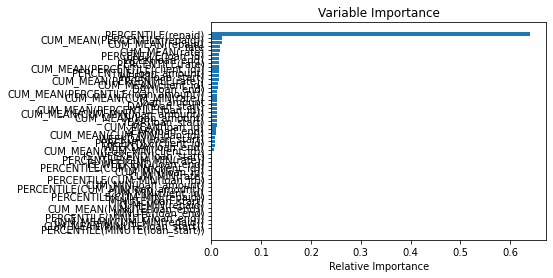

In [9]:

# Wow, now we have a great selection of features to experiment with!
import matplotlib.pyplot as plt

features = np.array(['loan_amount',
             'rate',
             'DAY(loan_start)',
             'DAY(loan_end)',
             'IS_WEEKEND(loan_start)',
             'IS_WEEKEND(loan_end)',
             'CUM_MIN(rate)',
             'CUM_MIN(client_id)',
             'CUM_MIN(loan_id)',
             'CUM_MIN(repaid)',
             'CUM_MIN(loan_amount)',
             'MINUTE(loan_start)',
             'MINUTE(loan_end)',
             'WEEKDAY(loan_start)',
             'WEEKDAY(loan_end)',
             'PERCENTILE(rate)',
             'PERCENTILE(client_id)',
             'PERCENTILE(loan_id)',
             'PERCENTILE(repaid)',
             'PERCENTILE(loan_amount)',
             'YEAR(loan_start)',
             'YEAR(loan_end)',
             'WEEK(loan_start)',
             'WEEK(loan_end)',
             'CUM_MEAN(rate)',
             'CUM_MEAN(client_id)',
             'CUM_MEAN(loan_id)',
             'CUM_MEAN(repaid)',
             'CUM_MEAN(loan_amount)',
             'PERCENTILE(CUM_MIN(repaid))',
             'PERCENTILE(CUM_MIN(rate))',
             'PERCENTILE(MINUTE(loan_start))',
             'PERCENTILE(CUM_MIN(client_id))',
             'PERCENTILE(CUM_MIN(loan_id))',
             'PERCENTILE(CUM_MIN(loan_amount))',
             'PERCENTILE(MINUTE(loan_end))',
             'CUM_MEAN(PERCENTILE(loan_id))',
             'CUM_MEAN(CUM_MIN(repaid))',
             'CUM_MEAN(CUM_MIN(rate))',
             'CUM_MEAN(PERCENTILE(loan_amount))',
             'CUM_MEAN(PERCENTILE(repaid))',
             'CUM_MEAN(MINUTE(loan_start))',
             'CUM_MEAN(PERCENTILE(rate))',
             'CUM_MEAN(CUM_MIN(client_id))',
             'CUM_MEAN(CUM_MIN(loan_id))',
             'CUM_MEAN(CUM_MIN(loan_amount))',
             'CUM_MEAN(MINUTE(loan_end))',
             'CUM_MEAN(PERCENTILE(client_id))'])

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(feature_matrix[features], feature_matrix['repaid'])

# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        48

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89

1.0


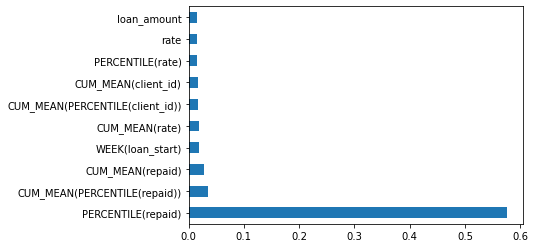

In [11]:

X = feature_matrix[features]
y = feature_matrix['repaid']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)


from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))


feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
# Success! Now we have some very interesting, and of course very useful, features with which we can train our model to maximize it's ability to correctly predict the target variable.


In [ ]:

# Data:
# https://github.com/brynmwangy/Beginner-Guide-to-Automated-Feature-Engineering-With-Deep-Feature-Synthesis./blob/master/loans.csv
